In [1]:
import time
import pandas as pd
import warnings
import feather
warnings.filterwarnings('ignore')
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
pd.set_option('display.max_columns', None)

In [2]:
DF_09 = pd.read_feather('2009/2009_FULL.feather')
DF_10 = pd.read_feather('2010/2010_FULL.feather')
DF_11 = pd.read_feather('2011/2011_FULL.feather')
DF_12 = pd.read_feather('2012/2012_FULL.feather')
DF_13 = pd.read_feather('2013/2013_FULL.feather')
DF_14 = pd.read_feather('2014/2014_FULL.feather')
DF_15 = pd.read_feather('2015/2015_FULL.feather')
DF_16 = pd.read_feather('2016/2016_FULL.feather')
DF_17 = pd.read_feather('2017/2017_FULL.feather')
DF_18 = pd.read_feather('2018/2018_FULL.feather')

In [3]:
DF = pd.concat([DF_09,DF_10,DF_11,DF_12,DF_13,DF_14,DF_15,DF_16,DF_17,DF_18])

In [ ]:
d.INF

In [67]:
k= pd.DataFrame()
k['miss'] = DF.isnull().sum()/DF.shape[0]
k['type'] = DF.dtypes
k.T

,CO_ANO,CO_ESCOLA,CO_INSCRICAO,NU_IDADE,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,EDU_PAI,EDU_MAE,OCU_MAE,OCU_PAI,QT_PESSOAS_CASA,RENDA_MENSAL,QT_CARRO,QT_MAQUINA_LAVAR,QT_TELEVISAO_CORES,QT_TV_ASSINATURA,QT_CELULAR,QT_TELEFONE_FIXO,QT_COMPUTADOR,QT_INTERNET,QT_CURSOU_EM,TP_ESCOLA_EF,QT_CURSOU_EF,TP_SEXO,TITULACAO,CO_DEPENDENCIA_ADM,CO_UF,CO_MUNICIPIO,IN_AGUA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_LABORATORIO_INFORMATICA,IN_LABORATORIO_CIENCIAS,IN_SALA_ATENDIMENTO_ESPECIAL,IN_QUADRA_ESPORTES,IN_BIBLIOTECA,IN_SALA_LEITURA,IN_BANHEIRO_FORA_PREDIO,IN_BANHEIRO_PNE,IN_DEPENDENCIAS_PNE,QT_SALAS_UTILIZADAS,QT_EQUIP_TV,QT_EQUIP_DVD,QT_EQUIP_COPIADORA,QT_EQUIP_IMPRESSORA,QT_COMP_ALUNO,IN_INTERNET,IN_BANDA_LARGA,QT_FUNCIONARIOS,IN_ALIMENTACAO,NU_NOTA_GERAL,TARGET,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_LINGUA,QT_BANHEIRO,QT_FREEZER,QT_ASPIRADOR,QT_TV _ASSINATURA,IN_INTERNET_x,TP_STATUS_REDACAO,COD_MUNICIPIO,IN_QUADRA_ESPORTES_COBERTA,IN_QUADRA_ESPORTES_DESCOBERTA,IN_INTERNET_y,IN_BANHEIRO_CHUVEIRO,IN_REFEITORIO,IN_DESPENSA,IN_ALMOXARIFADO,IN_AUDITORIO,IN_PATIO_COBERTO,IN_PATIO_DESCOBERTO,IN_AREA_VERDE,QT_EQUIP_SOM,QT_EQUIP_MULTIMIDIA,QT_EQUIP_FOTO,NUM_FUNCIONARIOS,ID_ALIMENTACAO,TP_NACIONALIDADE,IN_TREINEIRO,QT_MAQUINA_SECAR,QT_MICRO-ONDAS,QT_EQUIP_IMPRESSORA_MULT,QT_FUNCIOARIOS
miss,0,0,0,0,0,0,0,0,0,0,0,0,0.553356,0.553356,0,0,0.0798844,0.0798844,0.0798844,0.930507,0.0798844,0.0798844,0.0798844,0.930507,0.377152,0.278672,0.377152,0,0,0,0,0.850623,0,0,0,0,0,0,0.473471,0,0,0,0,0,0,0,0,0,0,0,0.850623,0,0.67331,0.386937,0,0,0.149377,0.149377,0.149377,0.149377,0.149377,0.149377,0.149377,0.149377,0.149377,0.149377,0.149377,0.149377,0.149377,0.149377,0.149377,0.235912,0.235912,0.235912,0.235912,0.235912,0.235912,0.235912,0.235912,0.235912,0.235912,0.235912,0.613063,0.613063,0.437351,0.622848,0.622848,0.622848,0.622848,0.713627
type,uint16,float64,float64,float32,object,float64,float64,float64,float64,float64,int64,int64,object,object,int64,int64,float64,float64,object,float64,object,object,object,float64,float64,object,object,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,object,float64,int64,float32,float32,float32,float32,float64,float64,float64,object,object,object,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,float64,float64,object,object,float64,float64


In [68]:
fields = ['IN_AGUA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_ENERGIA_INEXISTENTE', 'QT_EQUIP_TV','QT_EQUIP_DVD', 
          'QT_COMPUTADOR','QT_EQUIP_IMPRESSORA','QT_EQUIP_COPIADORA', 'IN_BANDA_LARGA', 'IN_BIBLIOTECA', 
          'IN_LABORATORIO_INFORMATICA']

DF['IN_INFRA_ELEMENTAR'] = 1
DF['IN_INFRA_BASICA'] = 1
DF['IN_INFRA_ADEQUADA'] = 1

infra_elementar = (DF.IN_AGUA_INEXISTENTE==1) | (DF.IN_ESGOTO_INEXISTENTE==1)|(DF.IN_ENERGIA_INEXISTENTE ==1)
infra_basica = (DF.QT_EQUIP_TV==0) | (DF.QT_EQUIP_DVD ==0) | (DF.QT_COMPUTADOR==0) | (DF.QT_EQUIP_IMPRESSORA==0)
infra_adequada = (DF.QT_EQUIP_COPIADORA == 0)|(DF.IN_BANDA_LARGA == 0)|(DF.IN_BIBLIOTECA==0)|(DF.IN_LABORATORIO_INFORMATICA==0) 


DF.loc[(infra_elementar), 'IN_INFRA_ELEMENTAR'] = 0
DF.loc[((infra_elementar) & (infra_basica)), 'IN_INFRA_BASICA'] = 0
DF.loc[((infra_elementar)& (infra_basica) & (infra_adequada)), 'IN_INFRA_ADEQUADA'] = 0


DF['IN_TP_ESCOLA'] = ""
DF.loc[(DF.CO_DEPENDENCIA_ADM== 2) | (DF.CO_DEPENDENCIA_ADM == 3), 'IN_TP_ESCOLA']= 'PUBLICA'
DF.loc[(DF.CO_DEPENDENCIA_ADM == 4), 'IN_TP_ESCOLA'] = 'PRIVADA'
DF.loc[(DF.CO_DEPENDENCIA_ADM == 1), 'IN_TP_ESCOLA'] = 'FEDERAL'


In [76]:
DF.groupby(['CO_ANO', 'IN_TP_ESCOLA', 'CO_UF'])['IN_INFRA_ELEMENTAR']

In [71]:
DF['IN_INFRA_ELEMENTAR'].value_counts()

1    105036
0       529
Name: IN_INFRA_ELEMENTAR, dtype: int64

In [72]:
DF['IN_INFRA_BASICA'].value_counts()

1    105249
0       316
Name: IN_INFRA_BASICA, dtype: int64

In [73]:
DF['IN_INFRA_ADEQUADA'].value_counts()

1    105319
0       246
Name: IN_INFRA_ADEQUADA, dtype: int64

In [74]:
DF.to_csv('ALL_YEARS.csv')

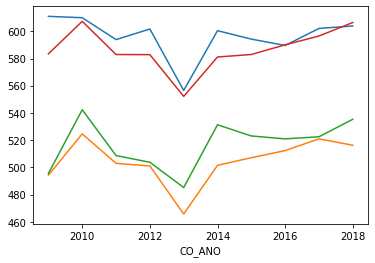

In [19]:
DF[DF['IN_TP_ESCOLA']==1].groupby(['CO_ANO'])['NU_NOTA_GERAL'].mean().plot()
DF[DF['CO_DEPENDENCIA_ADM']==2].groupby(['CO_ANO'])['NU_NOTA_GERAL'].mean().plot()
DF[DF['CO_DEPENDENCIA_ADM']==3].groupby(['CO_ANO'])['NU_NOTA_GERAL'].mean().plot()
DF[DF['CO_DEPENDENCIA_ADM']==4].groupby(['CO_ANO'])['NU_NOTA_GERAL'].mean().plot()

In [ ]:
DF.groupby(['CO_DEPENDENCIA'])